In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [9]:
df = pd.read_csv('../ressources/df_final.csv', sep=';', index_col=0)

In [ ]:
df

,primaryTitle,title,frenchTitle,startYear,genres,production_countries,runtimeMinutes,revenue,tagline,overview,id,averageRating,numVotes,actor,actress,director,producer,writer
tconst,,,,,,,,,,,,,,,,,,
tt0010307,J'accuse!,J'accuse,J'accuse,1919,"Horror, War, Romance, Drama, History",FR,166,0.0,NaN,"The story of two men, one married, the other t...",70804,7.7,2240,"Blaise Cendrars, Maxime Desjardins, Paul Duc, ...","Angèle Guys, Elizabeth Nizan, Mancini, Maryse ...",Abel Gance,Charles Pathé,Abel Gance
tt0013933,The Faithful Heart,Cœur fidèle,Coeur fidèle,1923,"Romance, Drama",FR,87,0.0,NaN,The good guys win out in this sweet tale about...,67440,7.4,1540,"Claude Benedict, Edmond Van Daële, Léon Mathot","Gina Manès, Madame Maufroy, Madeleine Erickson...",Jean Epstein,NaN,"Jean Epstein, Marie Epstein"
tt0015014,L'inhumaine,L'Inhumaine,L'inhumaine,1924,"Romance, ScienceFiction, Drama, Mystery",FR,135,0.0,NaN,"A famous singer Claire Lescot, who lives on th...",54539,7.2,1134,"Fred Kellerman, Jaque Catelain, Las Bonambella...","Georgette Leblanc, Kiki of Montparnasse, Marce...",Marcel L'Herbier,Marie-Laure de Noailles,"Georgette Leblanc, Joris-Karl Huysmans, Marcel..."
tt0017075,The Lodger: A Story of the London Fog,The Lodger: A Story of the London Fog,Les cheveux d'or,1927,"Thriller, Drama, Crime, Mystery",GB,92,0.0,NaN,London. A mysterious serial killer brutally mu...,2760,7.3,14289,"Arthur Chesney, Ivor Novello, Malcolm Keen, Re...","Daisy Campbell, Eve Gray, June Tripp, Marie Au...",Alfred Hitchcock,NaN,"Eliot Stannard, Marie Belloc Lowndes"
tt0017196,Nana,Nana,Nana,1926,"Romance, Drama",FR,150,0.0,NaN,"A government official, Count Muffat, falls und...",66812,6.6,1011,"Claude Autant-Lara, Jean Angelo, Karl Harbache...","Catherine Hessling, Jacqueline Forzane, Valesk...",Jean Renoir,Jean Renoir,"Denise Leblond, Pierre Lestringuez, Émile Zola"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9902160,Herself,Herself,Herself,2020,Drama,"IE,GB",97,0.0,Life under construction,Struggling to provide her daughters with a saf...,653708,7.0,5099,"Art Kearns, Ian Lloyd Anderson, Shadaan Felfeli","Anita Petry, Cathy Belton, Clare Dunne, Ericka...",Phyllida Lloyd,"Ed Guiney, Rory Gilmartin, Sharon Horgan","Clare Dunne, Malcolm Campbell"
tt9904802,Enemy Lines,Enemy Lines,Enemy Lines,2020,"Drama, Action, War",GB,92,0.0,Courage has no border.,"In the frozen, war torn landscape of occupied ...",679796,4.6,2041,"Corey Johnson, Daniel Jillings, Ed Westwick, G...",Maria Bondareva,Anders Banke,"Aleksandr Kushaev, Andy Thompson, Nadzeya Huse...","Michael Wright, Tom George"
tt9908390,Le lion,The Lion,Le lion,2020,Comedy,FR,95,0.0,NaN,A psychiatric hospital patient pretends to be ...,589970,5.5,1497,"Aksel Ustun, Benoît Pétré, Dany Boon, Mathieu ...","Anne Serra, Carole Brana, Sophie Verbeeck",Ludovic Colbeau-Justin,"Jean-Yves Robin, Marc Stanimirovic, Serge Hayat","Alexandre Coquelle, Matthieu Le Naour"


In [11]:
df.describe()

,startYear,runtimeMinutes,revenue,id,averageRating,numVotes
count,12665.000000,12665.000000,1.266500e+04,1.266500e+04,12665.000000,1.266500e+04
mean,2004.334386,100.866403,7.959074e+06,2.708402e+05,6.068006,1.789152e+04
std,17.705929,18.336841,5.654873e+07,2.885642e+05,1.132547,8.663695e+04
min,1919.000000,61.000000,0.000000e+00,1.600000e+01,1.300000,6.000000e+00
25%,1998.000000,90.000000,0.000000e+00,4.127100e+04,5.500000,3.150000e+02
50%,2010.000000,98.000000,0.000000e+00,1.285930e+05,6.300000,1.307000e+03
75%,2017.000000,108.000000,0.000000e+00,4.500500e+05,6.800000,5.482000e+03
max,2025.000000,240.000000,2.923706e+09,1.121899e+06,9.700000,3.019825e+06


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12665 entries, tt0010307 to tt9916362
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   primaryTitle          12665 non-null  object 
 1   title                 12665 non-null  object 
 2   frenchTitle           12665 non-null  object 
 3   startYear             12665 non-null  int64  
 4   genres                12665 non-null  object 
 5   production_countries  12665 non-null  object 
 6   runtimeMinutes        12665 non-null  int64  
 7   revenue               12665 non-null  float64
 8   tagline               4907 non-null   object 
 9   overview              12458 non-null  object 
 10  id                    12665 non-null  int64  
 11  averageRating         12665 non-null  float64
 12  numVotes              12665 non-null  int64  
 13  actor                 12552 non-null  object 
 14  actress               12276 non-null  object 
 15  director    

In [13]:
df.isna().sum()

primaryTitle               0
title                      0
frenchTitle                0
startYear                  0
genres                     0
production_countries       0
runtimeMinutes             0
revenue                    0
tagline                 7758
overview                 207
id                         0
averageRating              0
numVotes                   0
actor                    113
actress                  389
director                  57
producer                 737
writer                   176
dtype: int64

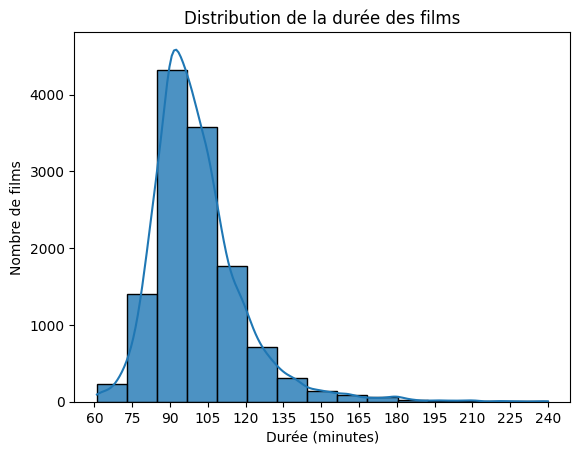

In [14]:
sns.histplot(data=df,x='runtimeMinutes', bins=15, kde=True, legend=False, alpha=0.8)

plt.title('Distribution de la durée des films')
max_rt = df["runtimeMinutes"].max()
plt.xticks(np.arange(60, max_rt + 15, 15))
plt.xlabel('Durée (minutes)')
plt.ylabel('Nombre de films')

plt.show()

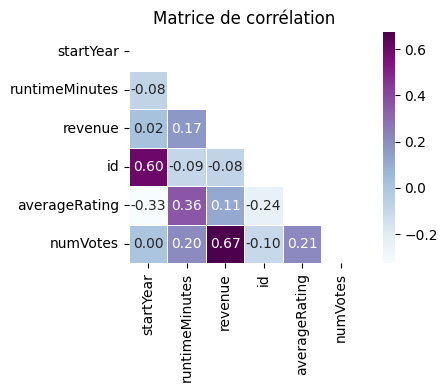

In [15]:
# Créer un dataframe avec les variables numériques
numeric_df = df.select_dtypes(include=[np.number])

# Matrice de corrélation entre les variables numériques et affiche de la heatmap
corr = numeric_df.corr()

# Créer un mask pour masquer la moitié supérieure de la matrice
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(6, 3))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='BuPu', mask=mask, square=True, linewidth=.5)
plt.title('Matrice de corrélation')
plt.show()

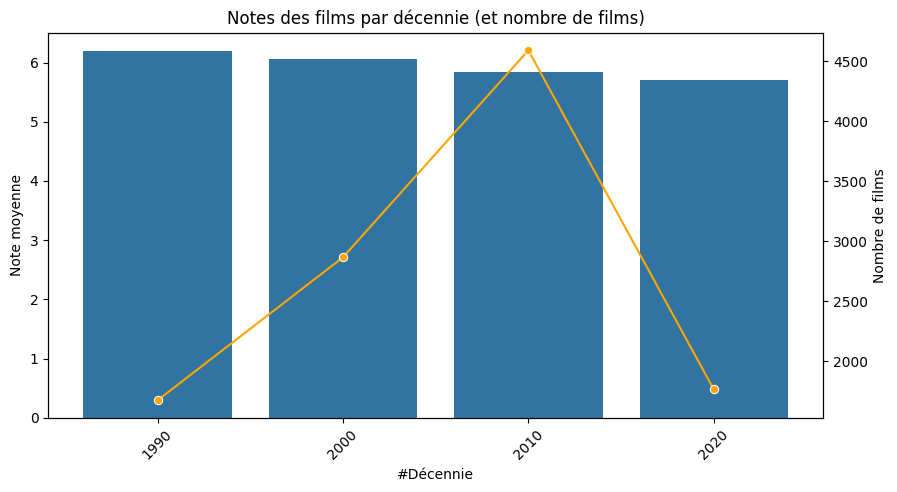

In [16]:
# Graphique des notes des films par décennie
df['year'] = pd.to_datetime(df['startYear'], format='%Y')

#On récupere uniquemente les années 90 et jusqu'à aujourd'hui
df_nineties = df[df['year'].dt.year >= 1990].copy()
df_nineties['year'] = df_nineties['year'].dt.year
# Créer une nouvelle colonne pour la décennie
df_nineties['decade'] = (df_nineties['year'] // 10) * 10
df_nineties['decade'] = df_nineties['decade'].astype(str)

# Créer un dataframe avec les notes moyennes par décennie
df_decade = df_nineties.groupby('decade').agg(
    averageRating=('averageRating', 'mean'),
    count=('averageRating', 'size')
    ).reset_index()


# Créatiop Création r le graphique
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()

# Créer un graphique à barres pour les notes moyennes par décennie 
sns.barplot(data=df_decade
, x='decade', y='averageRating', ax=ax1)

# Créer une ligne pour le nombre de films par décennie
sns.lineplot(data=df_decade, x='decade', y='count', ax=ax2, color='orange', marker='o')

ax1.set_xlabel('#Décennie')
ax1.set_ylabel('Note moyenne')
ax2.set_ylabel('Nombre de films')

ax1.set_xticks(df_decade['decade'])
ax1.set_xticklabels(df_decade['decade'], rotation=45)


plt.title('Notes des films par décennie (et nombre de films)')
plt.show()

In [17]:
# Créer un dataframe avec les notes moyennes par genre
df_genre = df_nineties.copy().reset_index()
df_genre = df_genre[['tconst', 'genres', 'averageRating']]
df_genre = (
    df_genre
    .assign(genres = df_genre['genres'].str.split(','))  # chaînage en liste
    .explode('genres')                                  # une ligne par genre
    .assign(genres = lambda d: d['genres'].str.strip()) # suppression des espaces en trop
    .query("genres != '' and genres == genres")
    )

# Créer un dataframe avec les notes moyennes par genre
df_genre = df_genre.groupby('genres').agg(
    averageRating=('averageRating', 'mean'),
    count=('averageRating', 'size')
    ).reset_index()

display(df_genre)

,genres,averageRating,count
0,Action,5.489060,1106
1,Adventure,5.828138,956
2,Animation,6.202215,316
3,Biography,6.639341,516
4,Comedy,5.900183,3820
5,Crime,5.932847,1440
6,Documentary,6.584416,77
7,Drama,6.226747,7511
8,Family,5.923583,547
9,Fantasy,5.800430,697


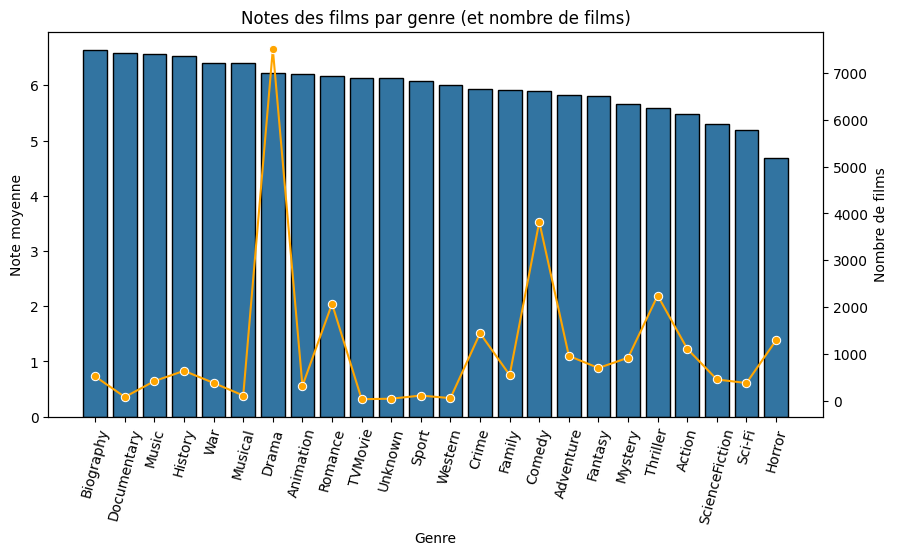

In [18]:
df_genre_sorted = df_genre.sort_values(by='averageRating', ascending=False)

# Création des axes pour le graphique
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()

# Créer un graphique à barres pour les notes moyennes par genre
bar = sns.barplot(data=df_genre_sorted, x='genres', y='averageRating', edgecolor='black', order=df_genre_sorted['genres'], ax=ax1)

# Créer une ligne pour le nombre de films par genre
sns.lineplot(data=df_genre_sorted, x='genres', y='count', ax=ax2, color='orange', marker='o')

ax1.set_xlabel('Genre')
ax1.set_ylabel('Note moyenne')
ax2.set_ylabel('Nombre de films')

ax1.set_xticks(df_genre_sorted['genres'])
ax1.set_xticklabels(df_genre_sorted['genres'], rotation=75)

plt.title('Notes des films par genre (et nombre de films)')
plt.show()

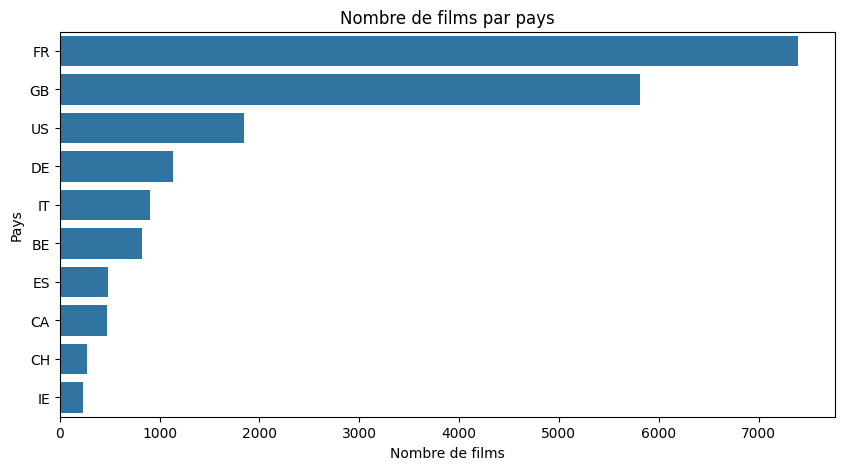

In [19]:
# Graphique pour la répartition des productions par pays

# Créer un dataframe avec les pays
df_country = df.copy().reset_index()
df_country = df_country[['tconst', 'production_countries']]

# Dupliquer le dataframe pour chaque pays
df_country = (
    df_country
    .assign(production_countries = df_country['production_countries'].str.split(','))  # chaînage en liste
    .explode('production_countries')                                  # une ligne par pays
    .assign(production_countries = lambda d: d['production_countries'].str.strip()) # suppression des espaces en trop
    .query("production_countries != '' and production_countries == production_countries")
    )

# Regrouper les pays par nombre de films
df_country = df_country.groupby('production_countries').agg(
    count=('production_countries', 'size')
    ).reset_index()


# Créer un graphique à barres pour le nombre de films par pays et n'afficher que les 10 premiers
df_country = df_country.sort_values(by='count', ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(data=df_country, x='count', y='production_countries')
plt.title('Nombre de films par pays')
plt.xlabel('Nombre de films')
plt.ylabel('Pays')
plt.show()


In [20]:
# Dataframe avec les acteurs les plus présents

df_cast = df.copy().reset_index()
df_cast = df_cast[['tconst', 'actor']]

df_cast = (
    df_cast
    .assign(actor = df_cast['actor'].str.split(','))  # chaînage en liste
    .explode('actor')                                  # une ligne par genre
    .assign(actor = lambda d: d['actor'].str.strip()) # suppression des espaces en trop
    .query("actor != '' and actor == actor")
    )


# Regrouper les acteurs par nombre de films
df_cast = df_cast.groupby('actor').agg(
    count=('actor', 'size')
    ).reset_index()

df_cast_sorted = df_cast.sort_values(by='count', ascending=False).head(10)
display(df_cast_sorted)

,actor,count
13576,Gérard Depardieu,116
11549,François Berléand,75
27108,Olivier Gourmet,71
8677,Denis Podalydès,69
17070,Jean-Pierre Darroussin,68
35048,Thierry Lhermitte,66
2352,André Dussollier,65
7430,Daniel Auteuil,62
23527,Mathieu Amalric,61
16828,Jean-François Stévenin,60


In [21]:
# Dataframe avec les realisateurs les plus présents

df_cast = df.copy().reset_index()
df_cast = df_cast[['tconst', 'director']]

df_cast = (
    df_cast
    .assign(director = df_cast['director'].str.split(','))  # chaînage en liste
    .explode('director')                                  # une ligne par genre
    .assign(director = lambda d: d['director'].str.strip()) # suppression des espaces en trop
    .query("director != '' and director == director")
    )


# Regrouper les acteurs par nombre de films
df_cast = df_cast.groupby('director').agg(
    count=('director', 'size')
    ).reset_index()

df_cast_sorted = df_cast.sort_values(by='count', ascending=False).head(10)
display(df_cast_sorted)

,director,count
1291,Claude Chabrol,38
3135,Jean-Luc Godard,28
4660,Michael Winterbottom,26
5189,Patrice Leconte,25
374,Andrew Jones,25
3761,Ken Loach,24
2403,Gerald Thomas,23
2246,François Ozon,22
7094,Éric Rohmer,22
2251,François Truffaut,22


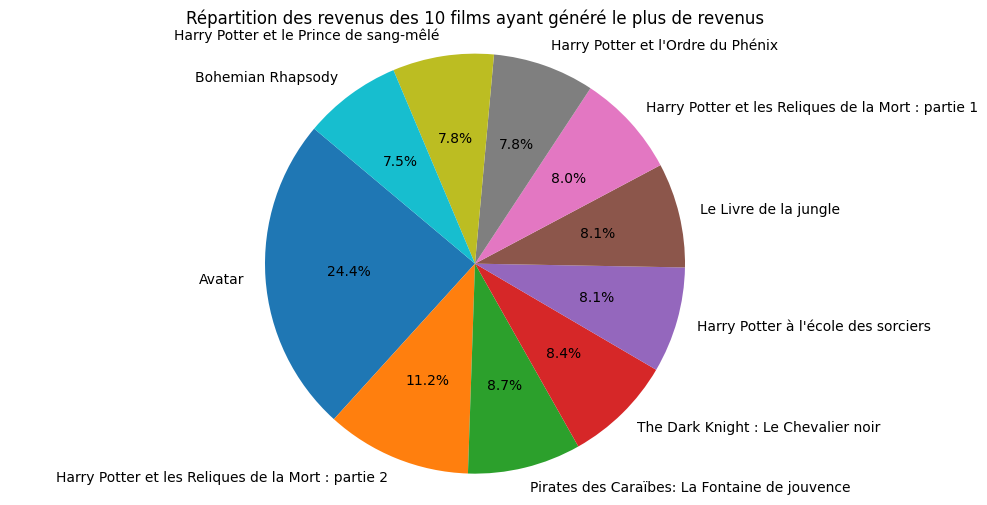

In [22]:
# Graphiques des films ayant generé le plus de revenus
df_revenue = df.copy().reset_index()

df_revenue = df_revenue[['tconst', 'frenchTitle', 'averageRating', 'revenue']]

# Garder les 10 films ayant généré le plus de revenus
df_revenue = df_revenue.sort_values(by='revenue', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.pie(df_revenue['revenue'], labels=df_revenue['frenchTitle'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.title('Répartition des revenus des 10 films ayant généré le plus de revenus')
plt.show()

In [23]:
# Evolution du nombre de films par année pour chaque décennie
df_evolution = df_nineties.copy().reset_index()

df_evolution = df_evolution[['tconst', 'year', 'decade']]
df_evolution = df_evolution.groupby(['year', 'decade']).agg(
    count=('year', 'size')
    ).reset_index()

df_evolution

,year,decade,count
0,1990,1990,133
1,1991,1990,141
2,1992,1990,155
3,1993,1990,145
4,1994,1990,155
5,1995,1990,163
6,1996,1990,165
7,1997,1990,184
8,1998,1990,212
9,1999,1990,222


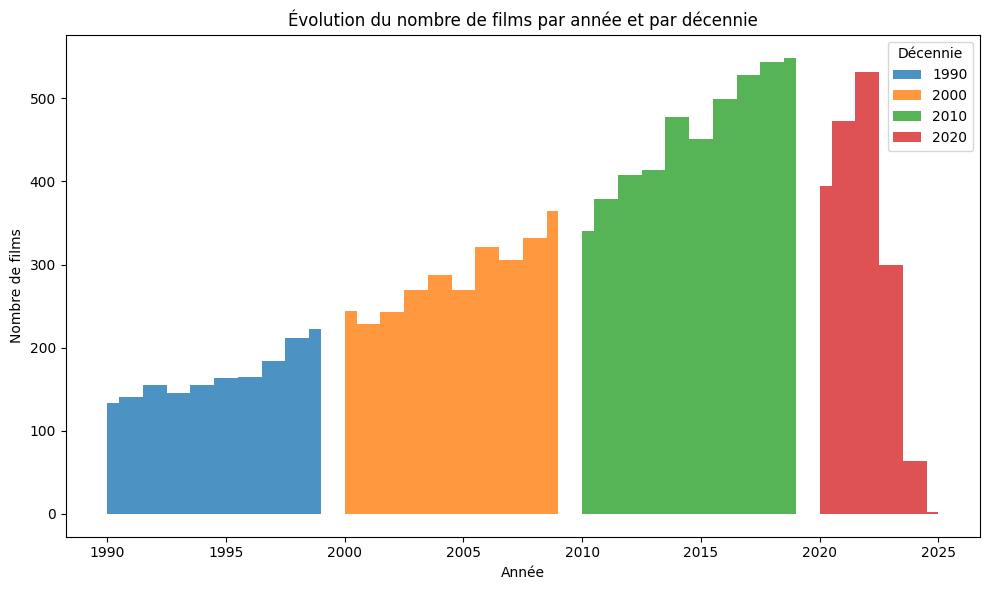

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# pour chaque décennie, on trace son aire
for dec in df_evolution['decade'].unique():
    sub = df_evolution[df_evolution['decade'] == dec]
    ax.fill_between(
        sub['year'],
        sub['count'],
        alpha=0.8,            # transparence pour voir le chevauchement
        label=dec,
        step='mid'            # optionnel : pour une marche par année
    )

ax.set_xlabel("Année")
ax.set_ylabel("Nombre de films")
ax.set_title("Évolution du nombre de films par année et par décennie")
ax.legend(title="Décennie")
plt.tight_layout()
plt.show()
